This IPython notebook is used for training the decision tree based Machine Learning model. Features: the diagnostic features are removed. Plot the tree visualization as well as the decision rules which is then used to identify the subgroups.

Next steps: Characterize these subgroups in terms of diagnostic markers (motor and non-motor symptoms)

In [1]:
!pip install missingpy

     ---------------------------------------- 0.0/49.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/49.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/49.1 kB 165.2 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/49.1 kB 219.4 kB/s eta 0:00:01
     -------------------------------------- 49.1/49.1 kB 227.2 kB/s eta 0:00:00


The system cannot find the path specified.


In [2]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 330.3 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/257.7 kB 657.6 kB/s eta 0:00:01
   ------------------------------- -------- 204.8/257.7 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 1.2 MB/s eta 0:00:00


The system cannot find the path specified.


In [3]:
import pandas as pd
import numpy as np
import os, sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
#from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV


In [4]:
import imblearn 
print(imblearn.__version__)

0.12.0


In [6]:
import matplotlib.pyplot as plt

In [7]:
from collections import Counter

In [8]:
trainX= pd.read_csv('../data/train_data_imputed_ML_classification_7thFeb2023.csv')
testX= pd.read_csv('../data/test_data_imputed_ML_classification_7thFeb2023.csv')
trainY= pd.read_csv('../data/target_label_train_data_imputed_ML_classification_7thFeb2023.csv')
testY= pd.read_csv('../data/target_label_test_data_imputed_ML_classification_7thFeb2023.csv')

In [9]:
trainX.columns

Index(['NP4WDYSK', 'NP2HYGN', 'NP2TURN', 'NP2EAT', 'NP3BRADY', 'NP1DPRS',
       'NP4FLCTI', 'NP3RTARL', 'NHY', 'NP4OFF', 'NP3FTAPL', 'NP2SPCH',
       'NP3LGAGL', 'NP2TRMR', 'NP3RTALJ', 'NP1LTHD', 'NP3PRSPR', 'GDS15SCORE',
       'NP1HALL', 'NP2DRES', 'NP3RISNG', 'NP3PSTBL', 'NP3FACXP', 'NP1APAT',
       'NP2SALV', 'NP1ANXS', 'NP2RISE', 'NP3GAIT', 'NP3FRZGT', 'NP3RIGRU',
       'NP3RTARU', 'NP3SPCH', 'NP3PTRMR', 'NP3HMOVL', 'NP3TTAPL', 'DYSKIRAT',
       'NP2HWRT', 'NP1DDS', 'NP3PRSPL', 'MINSNCLD', 'NP3KTRMR', 'pd_duration',
       'DYSKPRES', 'NP4DYSKI', 'NP1FATG', 'NP3RIGLU', 'gender', 'NP3TTAPR',
       'NP1PAIN', 'NP1SLPN', 'NP2HOBB', 'NP1SLPD', 'NP1CNST', 'NP1URN',
       'NP3RTALL', 'NP3HMOVR', 'LDOPARX', 'NP1COG', 'NP3RIGN', 'NP2WALK',
       'NP3POSTR', 'NP3RIGRL', 'NP4DYSTN', 'NP3RTCON', 'NP3LGAGR', 'NP3RIGLL',
       'NP2FREZ', 'NP3KTRML', 'NP3FTAPR', 'NP3PTRML', 'NP3RTALU',
       'demopd_ageassess', 'NP4FLCTX', 'NP2SWAL'],
      dtype='object')

In [10]:
# pd_duration feature should be removed as it is directly dependent on ageonset
trainX= trainX.drop(['pd_duration'], axis=1)
testX= testX.drop(['pd_duration'], axis=1)

In [11]:
print(trainX.dtypes)

NP4WDYSK            int64
NP2HYGN             int64
NP2TURN             int64
NP2EAT              int64
NP3BRADY            int64
                    ...  
NP3PTRML            int64
NP3RTALU            int64
demopd_ageassess    int64
NP4FLCTX            int64
NP2SWAL             int64
Length: 73, dtype: object


In [12]:
trainX_cat= trainX.astype('category')
testX_cat= testX.astype('category')

In [13]:
print(trainX_cat.dtypes)

NP4WDYSK            category
NP2HYGN             category
NP2TURN             category
NP2EAT              category
NP3BRADY            category
                      ...   
NP3PTRML            category
NP3RTALU            category
demopd_ageassess    category
NP4FLCTX            category
NP2SWAL             category
Length: 73, dtype: object


In [14]:
trainX_cat.demopd_ageassess = trainX_cat.demopd_ageassess.astype(int)
trainX_cat.GDS15SCORE = trainX_cat.GDS15SCORE.astype(int)
trainX_cat.MINSNCLD = trainX_cat.MINSNCLD.astype(int)
testX_cat.demopd_ageassess = testX_cat.demopd_ageassess.astype(int)
testX_cat.GDS15SCORE = testX_cat.GDS15SCORE.astype(int)
testX_cat.MINSNCLD = testX_cat.MINSNCLD.astype(int)

In [15]:
print(trainX_cat.dtypes)

NP4WDYSK            category
NP2HYGN             category
NP2TURN             category
NP2EAT              category
NP3BRADY            category
                      ...   
NP3PTRML            category
NP3RTALU            category
demopd_ageassess       int32
NP4FLCTX            category
NP2SWAL             category
Length: 73, dtype: object


In [16]:
if 'MINSNCLD' in trainX_cat.columns:
    print('Yes')

Yes


In [17]:
print(Counter(trainY['ageonset_label'])) # data set is quite balanced ->  1.434 : 1

Counter({'late-onset': 197, 'early-onset': 107})


In [18]:
197/107

1.841121495327103

In [19]:
trainX.describe(include='all')

,NP4WDYSK,NP2HYGN,NP2TURN,NP2EAT,NP3BRADY,NP1DPRS,NP4FLCTI,NP3RTARL,NHY,NP4OFF,...,NP3LGAGR,NP3RIGLL,NP2FREZ,NP3KTRML,NP3FTAPR,NP3PTRML,NP3RTALU,demopd_ageassess,NP4FLCTX,NP2SWAL
count,304.000000,304.000000,304.000000,304.000000,304.00000,304.000000,304.000000,304.000000,304.00000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.398026,1.588816,1.434211,1.023026,1.81250,1.312500,1.388158,0.565789,2.18750,1.203947,...,1.694079,1.552632,0.730263,0.253289,1.680921,0.516447,1.026316,62.782895,0.898026,0.657895
std,0.884108,1.128102,1.129684,0.793619,0.93398,1.026565,1.409770,0.927547,0.93044,1.070695,...,1.178114,1.029528,1.065328,0.658774,1.143282,0.824376,1.071364,11.718039,0.926042,0.852914
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,2.00000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,0.000000,2.00000,1.000000,...,2.000000,1.500000,0.000000,0.000000,2.000000,0.000000,1.000000,63.000000,1.000000,0.000000
75%,0.000000,2.000000,2.000000,1.000000,2.00000,2.000000,2.000000,1.000000,2.00000,2.000000,...,2.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,71.000000,1.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,5.00000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,87.000000,4.000000,4.000000


In [20]:
# oversampling the minority class
oversample_method= imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority', random_state=12345)
trainX_oversampled, trainY_oversampled= oversample_method.fit_resample(trainX_cat, trainY)

In [21]:
print(trainX_oversampled.shape)

(394, 73)


In [22]:
# After Random Oversampling
print(Counter(trainY_oversampled['ageonset_label']))

Counter({'late-onset': 197, 'early-onset': 197})


In [22]:
#trainX_oversampled['ageonset_label']= trainY_oversampled['ageonset_label']
#testX_cat['ageonset_label']= testY['ageonset_label']

In [23]:
trainX_oversampled.shape

(394, 73)

In [24]:
testX_cat.shape

(77, 73)

In [25]:
#trainX_oversampled.to_csv('./PD-subtyping/Feb2023/final_training_data_8thFeb2023.csv', index=False)
#testX_cat.to_csv('./PD-subtyping/Feb2023/final_test_data_8thFeb2023.csv', index=False)

### Scikit-learn decision tree cannot explicitly handle categorical variables -> they convert strings to numeric
### Thus, we instead use the "rpart" package in R to create the DecisionTree model

In [25]:
# change mapping of "late-onset" to 0 and "early onset" to 1
trainY_oversampled1= trainY_oversampled.replace({'ageonset_label': {'late-onset': 0, 'early-onset': 1}})
testY1= testY.replace({'ageonset_label': {'late-onset': 0, 'early-onset': 1}})

In [26]:
trainY_oversampled1.head()

,ageonset_label
0,0
1,1
2,0
3,1
4,1


In [27]:
print(Counter(trainY_oversampled1['ageonset_label']))

Counter({0: 197, 1: 197})


In [28]:
testY1.head()

,ageonset_label
0,0
1,0
2,0
3,1
4,0


In [29]:
clf_df= DecisionTreeClassifier()

In [30]:
print(trainX_oversampled.dtypes)

NP4WDYSK            category
NP2HYGN             category
NP2TURN             category
NP2EAT              category
NP3BRADY            category
                      ...   
NP3PTRML            category
NP3RTALU            category
demopd_ageassess       int32
NP4FLCTX            category
NP2SWAL             category
Length: 73, dtype: object


In [31]:
trainX_oversampled= trainX_oversampled.drop(['demopd_ageassess'], axis=1)
testX_cat= testX_cat.drop(['demopd_ageassess'], axis=1)

In [33]:
param_grid1= {'min_samples_leaf': [10, 12, 14,16, 18, 20],
'max_depth': [4, 8, 12, 16, 20],
'random_state': [12345],
'criterion': ['gini', 'entropy']
}

grid_search1= GridSearchCV(clf_df, param_grid=param_grid1, cv=10)
grid_search1.fit(trainX_oversampled, trainY_oversampled1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16, 20],
                         'min_samples_leaf': [10, 12, 14, 16, 18, 20],
                         'random_state': [12345]})

In [34]:
print ("Best Score: {}".format(grid_search1.best_score_))
print ("Best params: {}".format(grid_search1.best_params_))

Best Score: 0.6802564102564104
Best params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 12, 'random_state': 12345}


## Inference

Lower the min_samples_leaf value, more specific will be the subtype rules, and the tree depth will increase

Sp, we keep the min_samples_leaf feature value as 10

In [35]:
clf_df_best_minSampLeaf10_1= DecisionTreeClassifier(random_state=12345, criterion='gini', min_samples_leaf=12, max_depth=8)
clf_df_best_minSampLeaf10_1= clf_df_best_minSampLeaf10_1.fit(trainX_oversampled, trainY_oversampled1)

In [36]:
print(testX_cat.dtypes)

NP4WDYSK    category
NP2HYGN     category
NP2TURN     category
NP2EAT      category
NP3BRADY    category
              ...   
NP3FTAPR    category
NP3PTRML    category
NP3RTALU    category
NP4FLCTX    category
NP2SWAL     category
Length: 72, dtype: object


In [37]:
import matplotlib.pyplot as plt

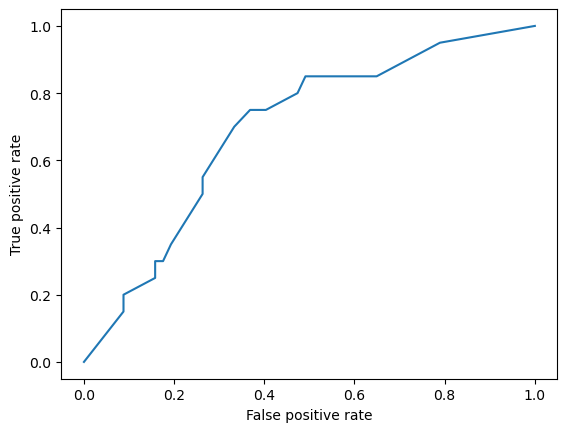

In [38]:
# create ROC curve
y_pred_proba= clf_df_best_minSampLeaf10_1.predict_proba(testX_cat)[::,1]
fpr, tpr, _ = roc_curve(testY1, y_pred_proba)

#decTree = plot_roc_curve(clf_df, testX, testY)
plt.plot(fpr, tpr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [39]:
predictY_minSampleLeaf10_1= clf_df_best_minSampLeaf10_1.predict(testX_cat)
accuracy_minSampleLeaf10_1= accuracy_score(testY1, predictY_minSampleLeaf10_1)
print(accuracy_minSampleLeaf10_1)

0.6753246753246753


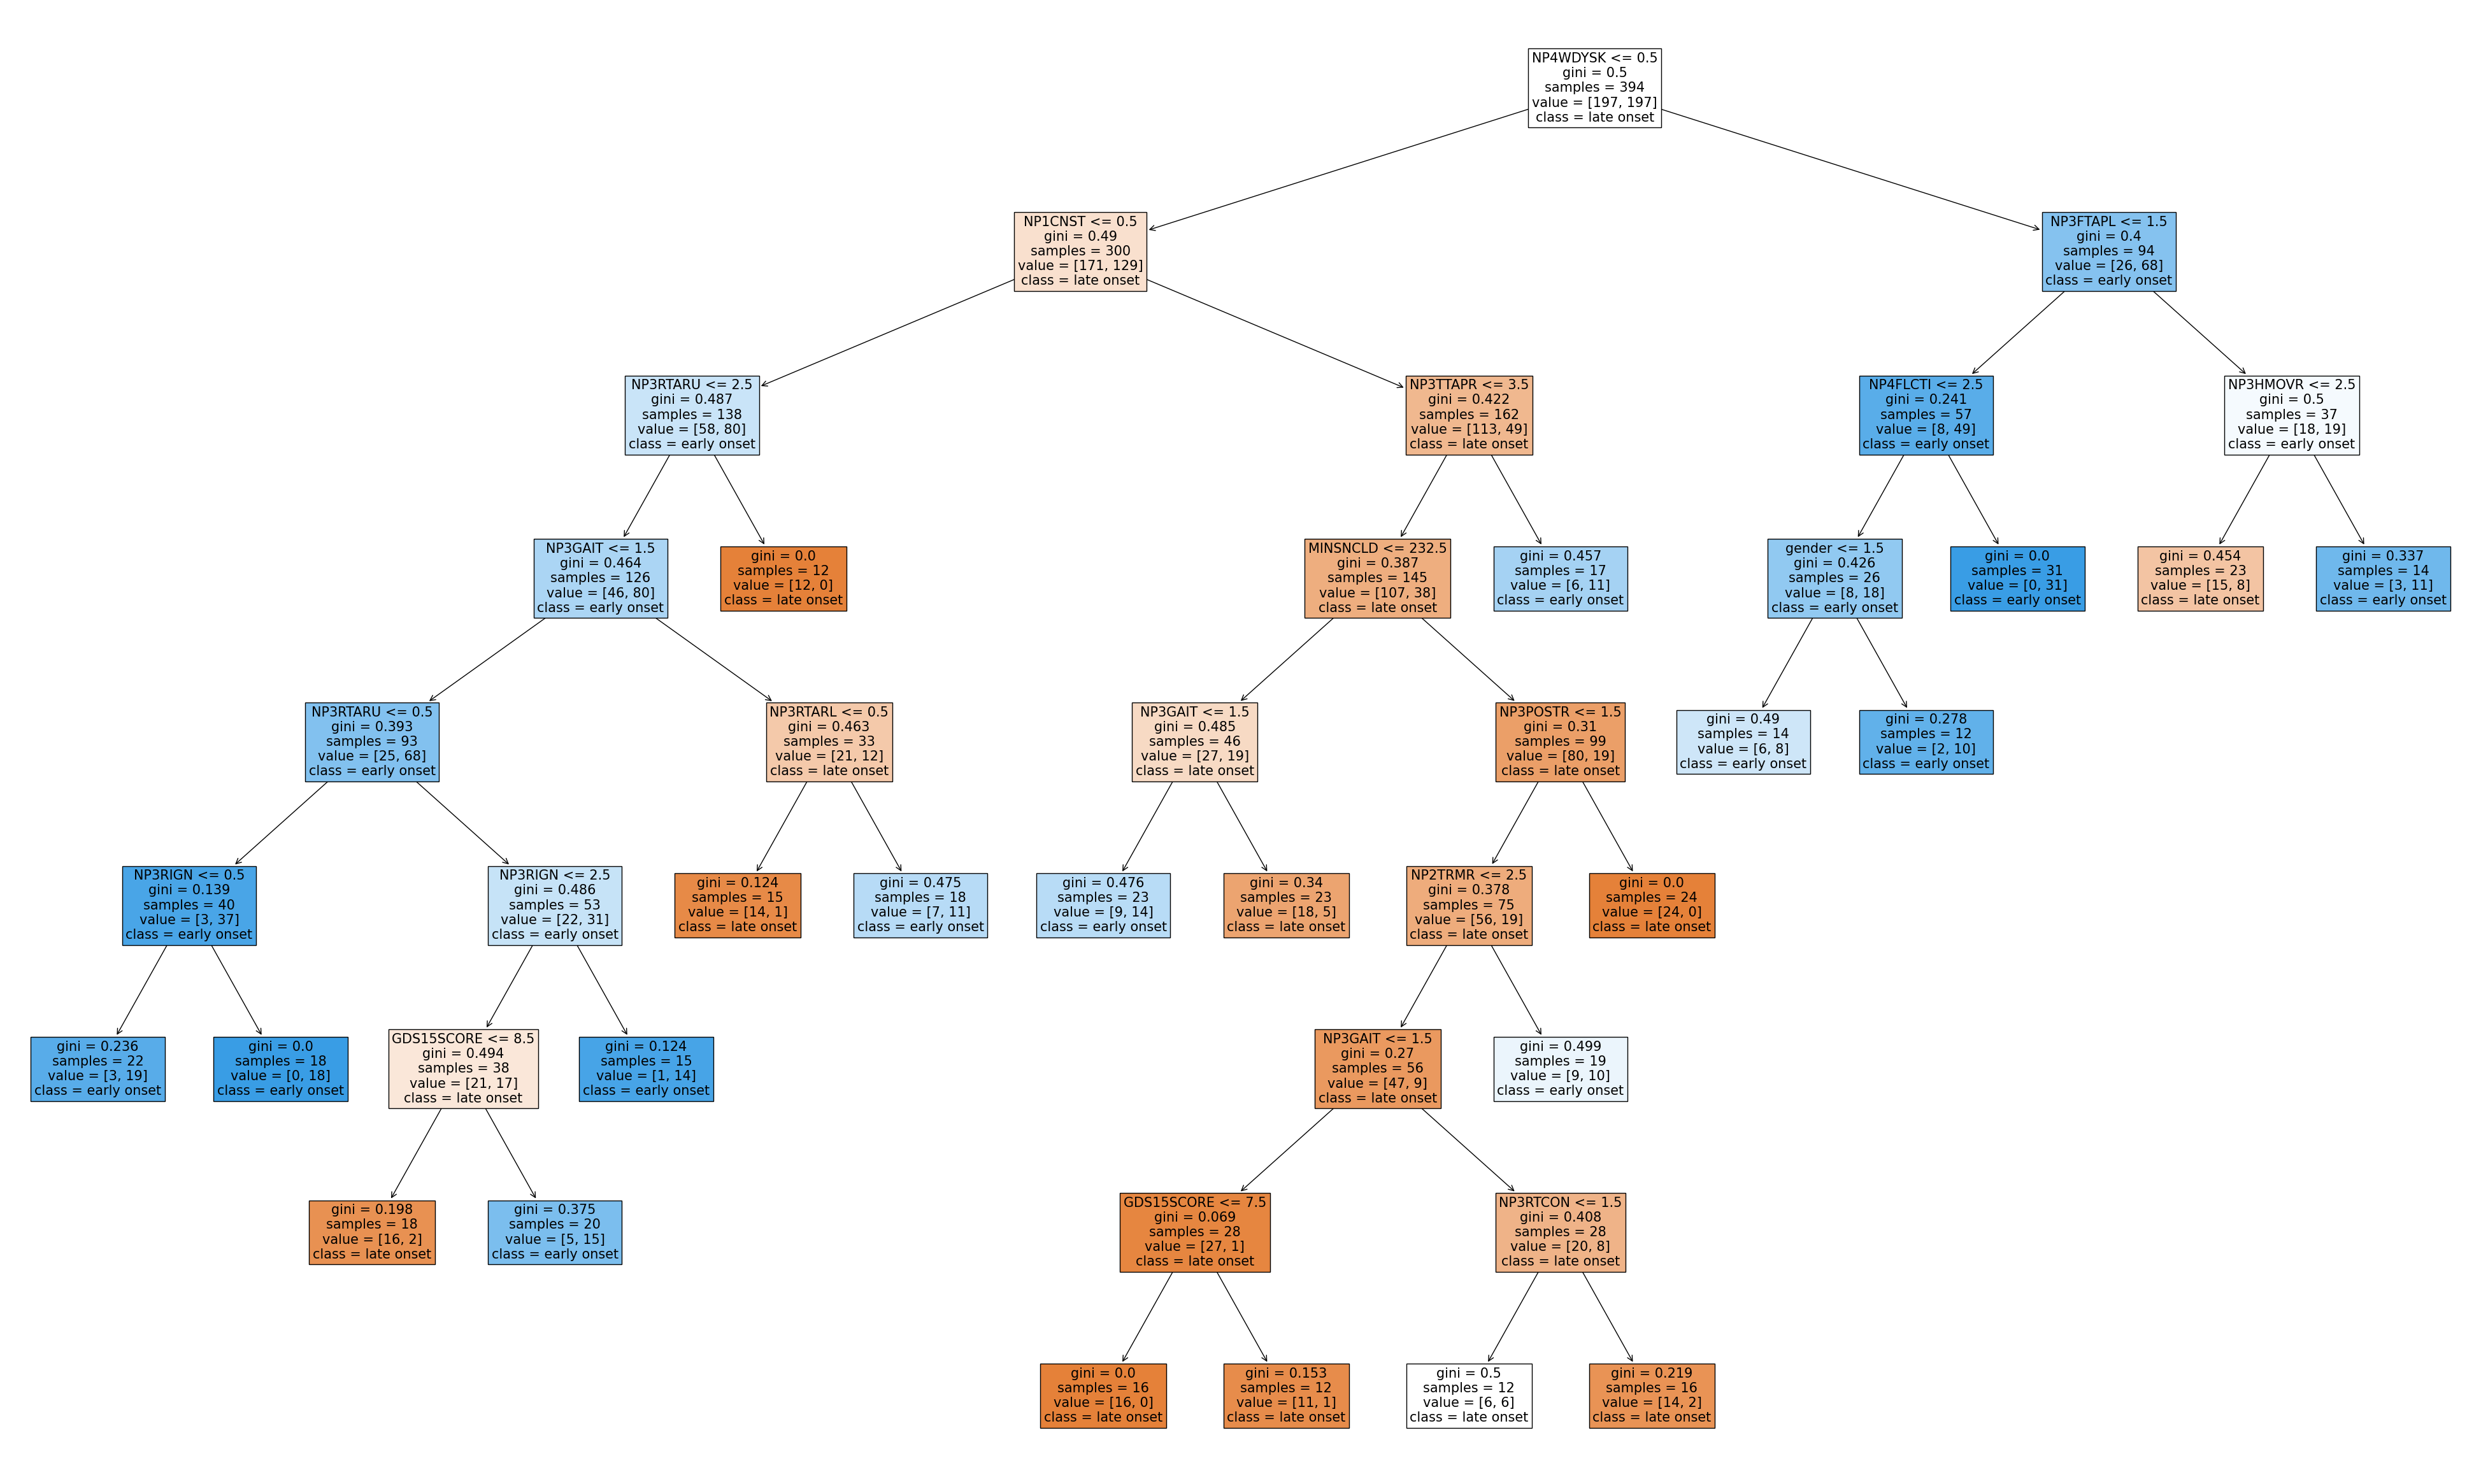

In [52]:
fig, ax = plt.subplots(figsize=(53, 25))
plot_tree(clf_df_best_minSampLeaf10_1, fontsize=25, feature_names=list(trainX_oversampled.columns), class_names= ['late onset', 'early onset'], filled=True)
fig.tight_layout()
plt.savefig('../results/decision_tree_minSampleLeaf10_1.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [48]:
feature_imp_new_1= pd.DataFrame.from_dict({'feature': list(trainX_oversampled.columns), 'impScore': list(clf_df_best_minSampLeaf10_1.feature_importances_)})
feature_imp1_new_1= feature_imp_new_1.sort_values(by=['impScore'], ascending= False)
feature_imp2_new_1= feature_imp1_new_1[feature_imp1_new_1['impScore']> 0.0]
feature_imp2_new_1.to_csv("../results/gini_feature_importance_values.csv", index=False)
print(feature_imp2_new_1)

       feature  impScore
30    NP3RTARU  0.147285
0     NP4WDYSK  0.128659
27     NP3GAIT  0.123748
51     NP1CNST  0.119603
17  GDS15SCORE  0.081741
57     NP3RIGN  0.056879
10    NP3FTAPL  0.056130
7     NP3RTARL  0.050642
46    NP3TTAPR  0.047093
13     NP2TRMR  0.039596
54    NP3HMOVR  0.034845
39    MINSNCLD  0.032067
6     NP4FLCTI  0.027954
59    NP3POSTR  0.024366
62    NP3RTCON  0.020135
45      gender  0.009255


Here, we extract the decision rules of the decision tree to identify the clinical subgroups. We will then characterize each subgroup based on the diagnostic biomarkers like UPDRS score, core more symptoms, non-motor rating  scales if available

In [49]:
from sklearn.tree import export_text
from pprint import pprint

In [51]:
tree_rules= export_text(clf_df_best_minSampLeaf10_1, feature_names=list(trainX_oversampled.columns))
pprint(tree_rules)

('|--- NP4WDYSK <= 0.50\n'
 '|   |--- NP1CNST <= 0.50\n'
 '|   |   |--- NP3RTARU <= 2.50\n'
 '|   |   |   |--- NP3GAIT <= 1.50\n'
 '|   |   |   |   |--- NP3RTARU <= 0.50\n'
 '|   |   |   |   |   |--- NP3RIGN <= 0.50\n'
 '|   |   |   |   |   |   |--- class: 1\n'
 '|   |   |   |   |   |--- NP3RIGN >  0.50\n'
 '|   |   |   |   |   |   |--- class: 1\n'
 '|   |   |   |   |--- NP3RTARU >  0.50\n'
 '|   |   |   |   |   |--- NP3RIGN <= 2.50\n'
 '|   |   |   |   |   |   |--- GDS15SCORE <= 8.50\n'
 '|   |   |   |   |   |   |   |--- class: 0\n'
 '|   |   |   |   |   |   |--- GDS15SCORE >  8.50\n'
 '|   |   |   |   |   |   |   |--- class: 1\n'
 '|   |   |   |   |   |--- NP3RIGN >  2.50\n'
 '|   |   |   |   |   |   |--- class: 1\n'
 '|   |   |   |--- NP3GAIT >  1.50\n'
 '|   |   |   |   |--- NP3RTARL <= 0.50\n'
 '|   |   |   |   |   |--- class: 0\n'
 '|   |   |   |   |--- NP3RTARL >  0.50\n'
 '|   |   |   |   |   |--- class: 1\n'
 '|   |   |--- NP3RTARU >  2.50\n'
 '|   |   |   |--- class: 0\n'
 '|